<a href="https://colab.research.google.com/github/AkankshaK-43/Projects_DS_ML/blob/main/%5CEDA%5CPlaystore_Apps_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 1 - ANALYSIS OF PLAYSTORE APPS DATA SETS**

---



## **Pre-processing and Analyzing data using Python**

In [ ]:
#Mounting the drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the data sets
df_app = pd.read_csv("/content/drive/MyDrive/Data Science & Machine Learning Projects/Android App Analysis/playstore_apps.csv",index_col='App')
df_review = pd.read_csv("/content/drive/MyDrive/Data Science & Machine Learning Projects/Android App Analysis/playstore_reviews.csv")

***Preprocessing of df_app data set***


In [ ]:
df_app.shape

(10841, 12)

In [ ]:
df_app.isnull().sum()

Category             0
Rating            1474
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df_app.duplicated().sum()

492

In [ ]:
df_app.dtypes

Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
df_app.head(5)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,07-01-2018,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-01-2018,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,01-08-2018,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,08-06-2018,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-06-2018,1.1,4.4 and up


In [ ]:
#REMOVING DUPLICATES
df_app.drop_duplicates(inplace=True,keep=False)

In [ ]:
df_app.duplicated().sum()

0

In [ ]:
#CHECKING IRRELEVANT VALUES
for col in df_app:
  print(col,df_app[col].unique())

Category ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
Rating [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   2.5  1.   1.9  2.9  2.8
  2.3  2.2  1.7  2.   1.8  2.7  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
Reviews [1.59000e+02 9.67000e+02 8.75100e+04 ... 6.03000e+02 1.19500e+03
 3.98307e+05]
Size ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'


In [ ]:
df_app[df_app['Category']=='1.9']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",NaN,4.0 and up,NaN


In [ ]:
df_app.drop("Life Made WI-Fi Touchscreen Photo Frame",inplace=True)

Removing nan from Android Ver column

In [ ]:
df_app[df_app['Android Ver'].isnull()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11M,1000.0,Paid,1.49,Everyone,Personalization,20-07-2018,4.4,NaN
Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1M,10000.0,Free,0.00,Everyone,Personalization,27-03-2018,1.1,NaN


In [ ]:
df_app.drop("[substratum] Vacuum: P",inplace=True)

In [ ]:
df_app[df_app['Android Ver'].isnull()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1M,10000.0,Free,0.0,Everyone,Personalization,27-03-2018,1.1,NaN


In [ ]:
df_app.drop("Pi Dark [substratum]",inplace=True)

In [ ]:
df_app[df_app['Android Ver'].isnull()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,


Removing nan from "Type" column

In [ ]:
df_app[df_app['Type'].isnull()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Command & Conquer: Rivals,FAMILY,NaN,0.0,Varies with device,0.0,NaN,0.0,Everyone 10+,Strategy,28-06-2018,Varies with device,Varies with device


In [ ]:
df_app.drop("Command & Conquer: Rivals",inplace=True)

In [ ]:
df_app[df_app['Type'].isnull()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,


Removing nan from "Rating" column

In [ ]:
df_app[df_app['Rating'].isnull()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61.0,7.0M,100000.0,Free,0.0,Everyone,Art & Design;Action & Adventure,07-03-2018,1.0.0,4.1 and up
Wrinkles and rejuvenation,BEAUTY,NaN,182.0,5.7M,100000.0,Free,0.0,Everyone 10+,Beauty,20-09-2017,8,3.0 and up
Manicure - nail design,BEAUTY,NaN,119.0,3.7M,50000.0,Free,0.0,Everyone,Beauty,23-07-2018,1.3,4.1 and up
Skin Care and Natural Beauty,BEAUTY,NaN,654.0,7.4M,100000.0,Free,0.0,Teen,Beauty,17-07-2018,1.15,4.1 and up
"Secrets of beauty, youth and health",BEAUTY,NaN,77.0,2.9M,10000.0,Free,0.0,Mature 17+,Beauty,08-08-2017,2,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
Cardio-FR,MEDICAL,NaN,67.0,82M,10000.0,Free,0.0,Everyone,Medical,31-07-2018,2.2.2,4.4 and up
Naruto & Boruto FR,SOCIAL,NaN,7.0,7.7M,100.0,Free,0.0,Teen,Social,02-02-2018,1,4.0 and up
payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38.0,9.8M,5000.0,Free,0.0,Everyone,Maps & Navigation,13-06-2018,2.0.148.0,4.0 and up


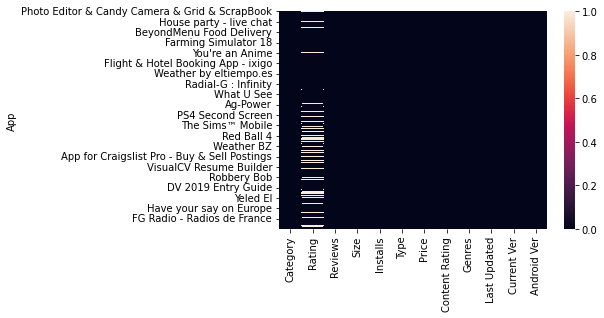

In [ ]:
# Null Imputation
sns.heatmap(df_app.isnull())

In [ ]:
df_app.isnull().sum()/df_app.shape[0]*100

Category           0.000000
Rating            14.527504
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.000000
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
Current Ver        0.080596
Android Ver        0.000000
dtype: float64

In [ ]:
df_app.isnull().sum()

Category             0
Rating            1442
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

In [ ]:
try:
    # mean = df_app['Rating	'].mean()
    df_app['Rating'] =df_app['Rating'].fillna(0)
except:
    pass

In [ ]:
df_app.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

In [ ]:
#CHECKING IRRELEVANT VALUES
for col in df_app:
  print(col,df_app[col].unique())

Category ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Rating [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  0.  4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  2.5 1.  1.9 2.9 2.8 2.3 2.2 1.7 2.  1.8 2.7 2.4 1.6
 2.1 1.4 1.5 1.2]
Reviews [1.59000e+02 9.67000e+02 8.75100e+04 ... 6.03000e+02 1.19500e+03
 3.98307e+05]
Size ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M

## ***Preprocessing of df_review data set***

In [ ]:
df_review.shape

(64295, 5)

In [ ]:
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
df_review.duplicated().sum()

33616

In [ ]:
#Dropping Duplicates from data
df_review.drop_duplicates(inplace=True,keep=False)

In [ ]:
df_review.duplicated().sum()

0

In [ ]:
df_review.isnull().sum()

App                        0
Translated_Review         73
Sentiment                 68
Sentiment_Polarity        68
Sentiment_Subjectivity    68
dtype: int64

In [ ]:
df_review.shape

(24327, 5)

In [ ]:
for col in df_review:
  print(col,df_review[col].unique())

App ['104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室' '11st'
 '1LINE – One Line with One Touch'
 '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif'
 '21-Day Meditation Experience' '2Date Dating App, Love and matching'
 '2GIS: directory & navigator' '2RedBeans' '2ndLine - Second Phone Number'
 '30 Day Fitness Challenge - Workout at Home' '365Scores - Live Scores'
 '3D Live Neon Weed Launcher' '4 in a Row'
 '4K Wallpapers and Ultra HD Backgrounds'
 '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢' '591房屋交易-香港'
 '7 Cups: Anxiety & Stress Chat' '7 Day Food Journal Challenge'
 '7 Minute Workout' '7 Weeks - Habit & Goal Tracker' '8 Ball Pool'
 '850 Sports News Digest' '8fit Workouts & Meal Planner'
 'A Call From Santa Claus!' 'A Word A Day'
 'A&E - Watch Full Episodes of TV Shows' 'A+ Gallery - Photos & Videos'
 'A+ Mobile' 'ABC Kids - Tracing & Phonics' 'ABC News - US & World News'
 'ABC Preschool Free' 'ABCmouse.com' 'AC - Tips & News for Android™'
 'ACE Elite' 'AD - Nieuws, Sport, Regio & Entertainm

In [ ]:
#We don't have much idea of Sentiment related info hence deleting the rows which contains any nanas

In [ ]:
df_review[df_review['Sentiment'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
628,2RedBeans,NaN,NaN,NaN,NaN
1594,850 Sports News Digest,NaN,NaN,NaN,NaN
5155,Airway Ex - Intubate. Anesthetize. Train.,NaN,NaN,NaN,NaN
5238,AlReader -any text book reader,NaN,NaN,NaN,NaN
6939,Amtrak,NaN,NaN,NaN,NaN
...,...,...,...,...,...
58085,H TV,NaN,NaN,NaN,NaN
59148,HTC Lock Screen,NaN,NaN,NaN,NaN
59404,HTC Social Plugin - Facebook,NaN,NaN,NaN,NaN
59432,HTC Speak,NaN,NaN,NaN,NaN


In [ ]:
ind = df_review[(df_review['Sentiment'].isnull())].index
ind


Int64Index([  628,  1594,  5155,  5238,  6939,  7088, 10605, 11258, 12393,
            14440, 14852, 14913, 14977, 16243, 16266, 16295, 16755, 20495,
            24914, 25255, 25290, 25356, 26300, 26495, 26571, 26693, 26726,
            28251, 29183, 29559, 29595, 32599, 33646, 33827, 35625, 35683,
            35825, 37205, 37326, 38833, 38974, 39267, 39324, 40310, 40337,
            40867, 41919, 42025, 42055, 43534, 44675, 44844, 51818, 52438,
            53158, 54087, 54131, 54298, 54497, 54571, 57526, 57591, 57617,
            58085, 59148, 59404, 59432, 60725],
           dtype='int64')

In [ ]:
for i in ind:
  df_review.drop(i,inplace=True)

In [ ]:
df_review.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
ind2 = df_review[(df_review['Translated_Review'].isnull())].index
for i in ind2:
  df_review.drop(i,inplace=True)

In [ ]:
df_review.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
from google.colab import files
df_review.to_csv('cleaned_reviews.csv', encoding = 'utf-8-sig') 
files.download('cleaned_reviews.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
df_app.to_csv('cleaned_apps.csv', encoding = 'utf-8') 
files.download('cleaned_apps.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>